# NPPE - Pre-Processing

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#  loading data
df = pd.read_csv("NPPE1_Preprocessing1.csv")
df.head()

,CRIM,ZN,INDUS,POLINDEX,RM,AGE,DIS,HIGHWAYCOUNT,TAX,PTRATIO,IMM,BPL,PRICE,RIVERSIDE
0,1.026769,1.429034,7.851300,1.134216,6.0,42.0,5.251911,5,279.201277,20.689586,398.811960,10.461456,22.991633,NO
1,0.848089,0.255543,6.263434,1.245993,7.0,63.0,4.305546,8,307.444529,17.465398,377.153649,11.619690,24.551055,NO
2,10.925905,0.441022,18.322960,2.824833,8.0,-2.0,2.409495,25,666.492973,20.351601,387.061355,19.366070,15.875346,NO
3,0.559027,1.041175,11.114920,0.794952,6.0,9.0,6.898669,4,305.514181,19.787314,391.778647,6.206820,23.007756,NO
4,0.905063,81.167963,3.673369,1.029030,8.0,20.0,10.246463,1,315.913960,17.360439,395.833166,10.827105,21.503177,NO


In [3]:
df.shape

(4000, 14)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,4000.0,2.174158,2.475646,0.031093,0.622728,1.227945,2.377738,12.619405
ZN,4000.0,12.734715,23.312649,0.000281,0.464314,1.068245,20.323531,101.670740
INDUS,4000.0,11.208752,6.827509,0.633388,5.705110,8.906823,18.509019,30.367209
POLINDEX,4000.0,1.331900,0.601024,0.405085,0.864207,1.218840,1.694232,4.156570
RM,4000.0,7.044500,1.240526,-1.000000,6.000000,7.000000,8.000000,11.000000
AGE,4000.0,66.005000,29.100923,-2.000000,41.000000,74.000000,93.000000,103.000000
DIS,4000.0,4.820784,2.174427,1.163082,3.117734,4.325631,6.197419,14.045318
HIGHWAYCOUNT,4000.0,8.464000,7.460169,1.000000,4.000000,6.000000,7.000000,27.000000
TAX,4000.0,376.932036,150.270818,187.025099,277.418380,308.255685,405.418015,713.028133
PTRATIO,4000.0,19.051638,2.267293,12.641899,17.634064,19.386282,20.809079,24.322091


In [5]:
# home with rooms greater than 5
df[df['RM'] >= 5]['RM'].count()

3953

In [6]:
# avg price of top 10 expensive homes
df.sort_values(by='PRICE', ascending=False)['PRICE'].iloc[:10].mean()

52.36590175716407

In [7]:
# null values in the room
df[df['RM'] == -1]['RM'].count()

40

In [8]:
# null values in AGE
df[df['AGE'] == -2]['AGE'].count()

50

In [9]:
# null values in reverside feature
df[df['RIVERSIDE'] == 'UNKNOWN']['RIVERSIDE'].count()

88

In [10]:
# number of houses build near riverside in past 50 year
df[(df['RIVERSIDE'] == 'YES') & (df['AGE'] <= 50) & (df['RIVERSIDE'] != 'UNKNOWN') & (df['AGE'] != -2)].count()

CRIM            44
ZN              44
INDUS           44
POLINDEX        44
RM              44
AGE             44
DIS             44
HIGHWAYCOUNT    44
TAX             44
PTRATIO         44
IMM             44
BPL             44
PRICE           44
RIVERSIDE       44
dtype: int64

In [11]:
df[df['HIGHWAYCOUNT'].isin([6,7,8])].count()

CRIM            1211
ZN              1211
INDUS           1211
POLINDEX        1211
RM              1211
AGE             1211
DIS             1211
HIGHWAYCOUNT    1211
TAX             1211
PTRATIO         1211
IMM             1211
BPL             1211
PRICE           1211
RIVERSIDE       1211
dtype: int64

In [27]:
# binning price
df['CATEGORY'] = pd.cut(df['PRICE'], bins=[0, 10, 20, 30, 40, 100], right=False)

In [28]:
df['CATEGORY'].value_counts()

CATEGORY
[20, 30)     2028
[10, 20)     1158
[30, 40)      503
[40, 100)     268
[0, 10)        43
Name: count, dtype: int64

## Data-Preprocessing

In [29]:
# converting 
# -2 in AGE
# -1 in RM and
# `UNKNOWN` in RIVERSIDE 
#  to np.nan

df['AGE'].replace(-2, np.nan, inplace=True)
df['RM'].replace(-1, np.nan, inplace=True)
df['RIVERSIDE'].replace('UNKNOWN', np.nan, inplace=True)

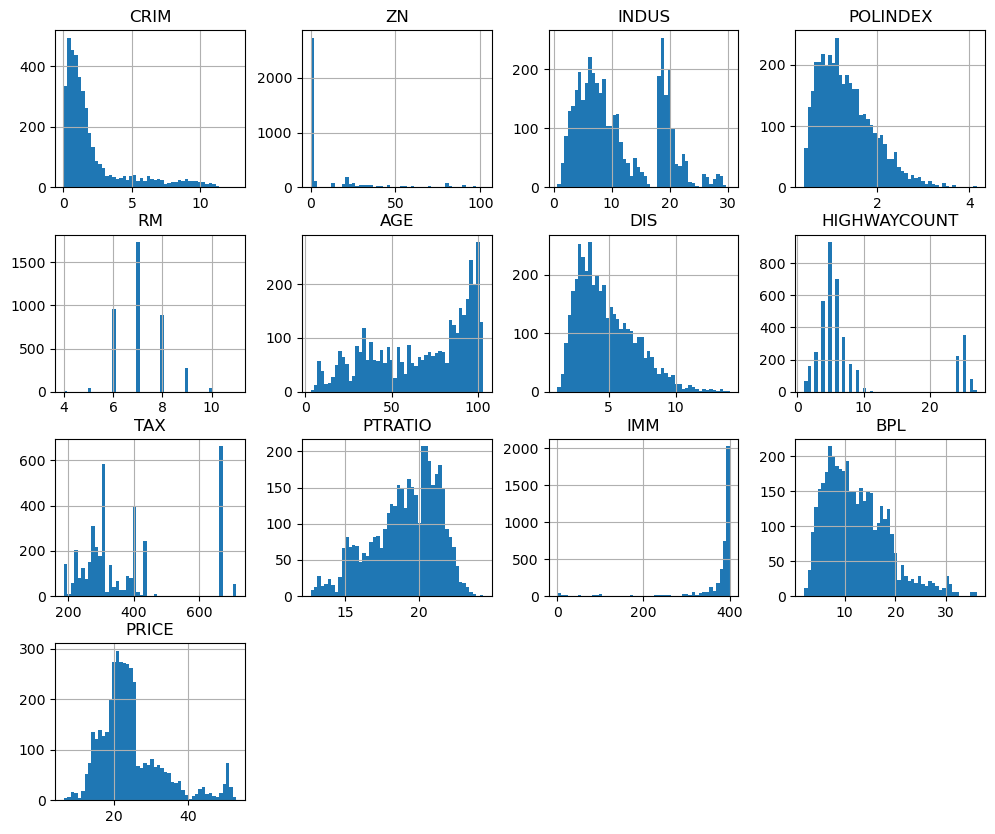

In [30]:
# visualising data distribution to guess how to convert it to bell shape
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12, 10))
plt.show()

In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'POLINDEX', 'RM', 'AGE', 'DIS', 'HIGHWAYCOUNT',
       'TAX', 'PTRATIO', 'IMM', 'BPL', 'PRICE', 'RIVERSIDE', 'CATEGORY'],
      dtype='object')

In [32]:
df.drop(['CATEGORY'], axis=1, inplace=True)

In [35]:
# splitting data into train - test
from sklearn.model_selection import train_test_split

features = ['CRIM', 'ZN', 'INDUS', 'POLINDEX', 'RM', 'AGE', 'DIS', 'HIGHWAYCOUNT',
       'TAX', 'PTRATIO', 'IMM', 'BPL', 'RIVERSIDE']

target = ['PRICE']

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=0)

X_train.shape

(2800, 13)

In [36]:
# categorise features for scaling
min_max_attr = ['CRIM', 'ZN', 'POLINDEX', 'DIS', 'HIGHWAYCOUNT', 'TAX', 'PTRATIO', 'IMM', 'BPL']
scaler_attr = ['INDUS']
RM_pipeline = ['RM']
AGE_pipeline = ['AGE']
RIVERSIDE_pipeline = ['RIVERSIDE']


In [37]:
# making preprocessing pipelines
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

minmax_scaler = Pipeline([
    ('minmax_scaler', MinMaxScaler())
])

stander_scaler = Pipeline([
    ('std_scaler', StandardScaler())
])

median_minmax_imputer = Pipeline([
    ('median_imputer', SimpleImputer(strategy='median')),
    ('MinMax', MinMaxScaler())
])

mean_scaler_imputer = Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean')),
    ('minmax', MinMaxScaler())
])

freq_onehot_imputer = Pipeline([
    ('most_freq_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder())
])


transformer = ColumnTransformer(
    transformers=[
        ('minmax', minmax_scaler, min_max_attr),
        ('rm', median_minmax_imputer, RM_pipeline),
        ('age', mean_scaler_imputer, AGE_pipeline),
        ('riverseide', freq_onehot_imputer, RIVERSIDE_pipeline)
    ],
    remainder='passthrough'
)

In [42]:
trans_train_df = transformer.fit_transform(X_train)
trans_test_df = transformer.transform(X_test)

In [43]:
trans_test_df.shape

(1200, 14)

In [44]:
trans_test_df.mean()

1.2003499318512814

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('crim', MinMaxScaler(), ['CRIM']),
        ('zn', MinMaxScaler(), ['ZN']),
        ('indus', StandardScaler(), ['INDUS']),
        ('polindex', MinMaxScaler(), ['POLINDEX']),
        ('dis', MinMaxScaler(), ['DIS']),
        ('highwaycount', MinMaxScaler(), ['HIGHWAYCOUNT']),
        ('tax', MinMaxScaler(), ['TAX']),
        ('ptratio', MinMaxScaler(), ['PTRATIO']),
        ('imm', MinMaxScaler(), ['IMM']),
        ('bpl', MinMaxScaler(), ['BPL']),
        ('rm', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), ['RM']),
        ('age', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), ['AGE']),
        ('riverside', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse_output=False))
        ]), ['RIVERSIDE'])
    ],
    remainder='passthrough'
)

In [46]:
temp_train_df = preprocessor.fit_transform(X_train)
temp_test_df = preprocessor.transform(X_test)

temp_test_df.mean()

0.3861745655097562